<a href="https://colab.research.google.com/github/njha1999/DIP_Conference_DCT_Group_12/blob/main/DIP_Conference_DCT_Group_12_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!git clone https://github.com/njha1999/DIP_Conference_DCT_Group_12.git


fatal: destination path 'DIP_Conference_DCT_Group_12' already exists and is not an empty directory.


In [20]:
!pip install imagecodecs

     |████████████████████████████████| 17.9MB 208kB/s 


In [21]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
import imageio

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


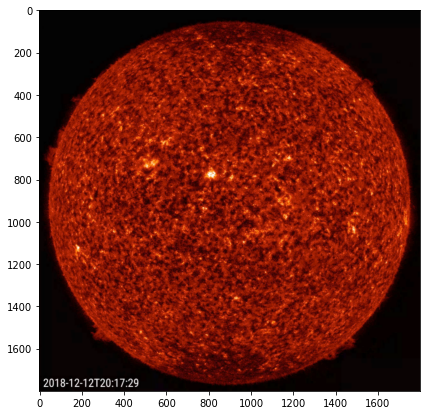

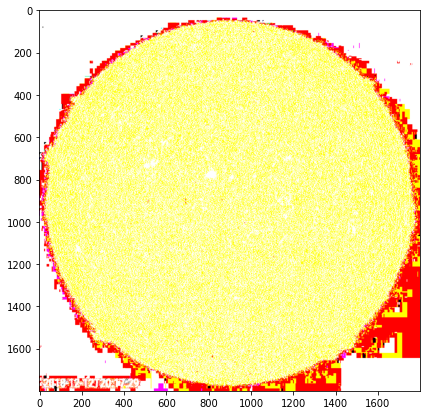

In [32]:
from matplotlib.pyplot import imread
original = imread("DIP_Conference_DCT_Group_12/Image.tif")
f = plt.figure()
plt.imshow(original)

im = imread("DIP_Conference_DCT_Group_12/Image.tif").astype(float)
f = plt.figure()
plt.imshow(im,cmap='gray')

In [35]:
import scipy.fftpack
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [36]:
imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'An 8x8 DCT block')

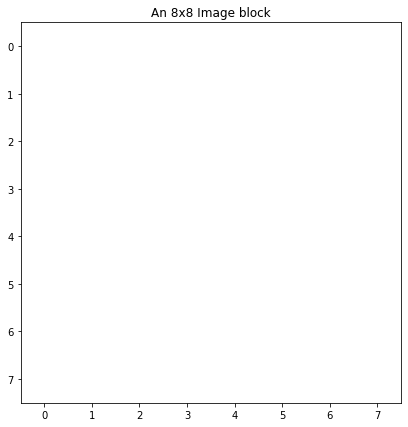

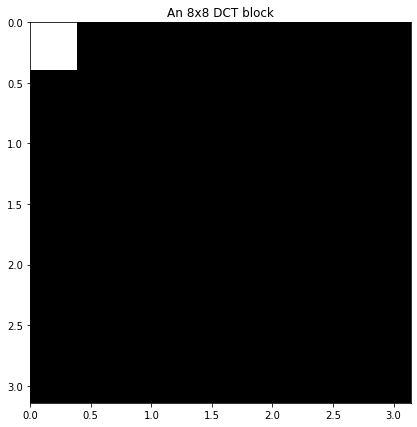

In [37]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '8x8 DCTs of the image')

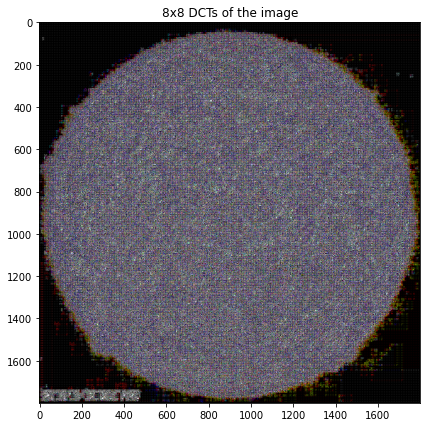

In [38]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Keeping only 11.506728% of the DCT coefficients


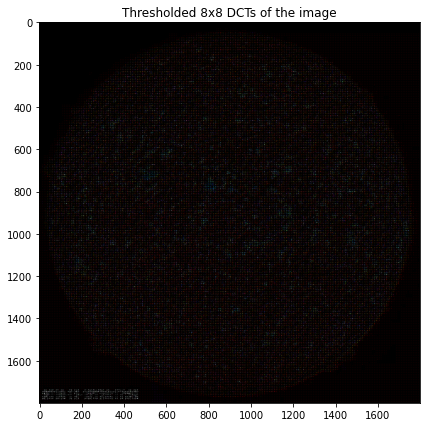

In [40]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

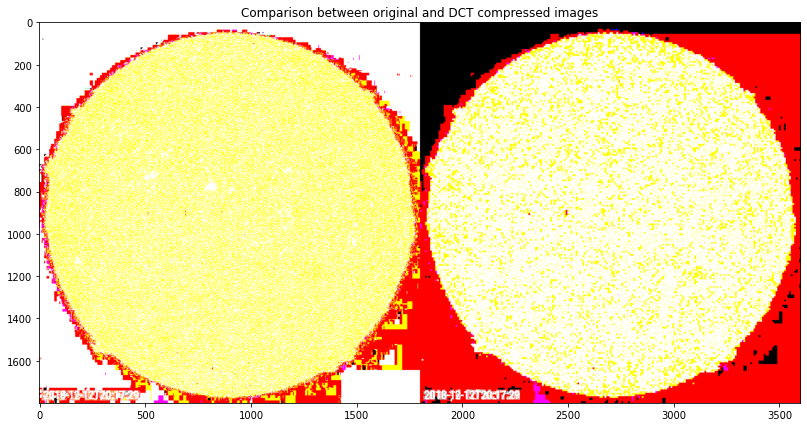

In [41]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )